## Utilities

In [95]:
figures_dir = "/home/liad/dev/research/figures"

def save_fig(fig, name, end="jpg"):
    full_path = f"{figures_dir}/{name}.{end}"
    fig.savefig(full_path)

# Attack Rank

### Actual Attack Rank

In [29]:
import pandas as pd
import numpy as np
from glob import glob

def merge_ucb_ratings(results_dir, order_name):
    dfs = []
    for ratings in glob(f"{results_dir}/place_{order_name}*"):
        df = pd.read_csv(ratings)
        dfs.append(df)
    merged_df = pd.concat(dfs)
    return merged_df

# Evading Attacks - Medium Size

# 0.0 - 0.0

In [105]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//8).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//8).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//8).mean()


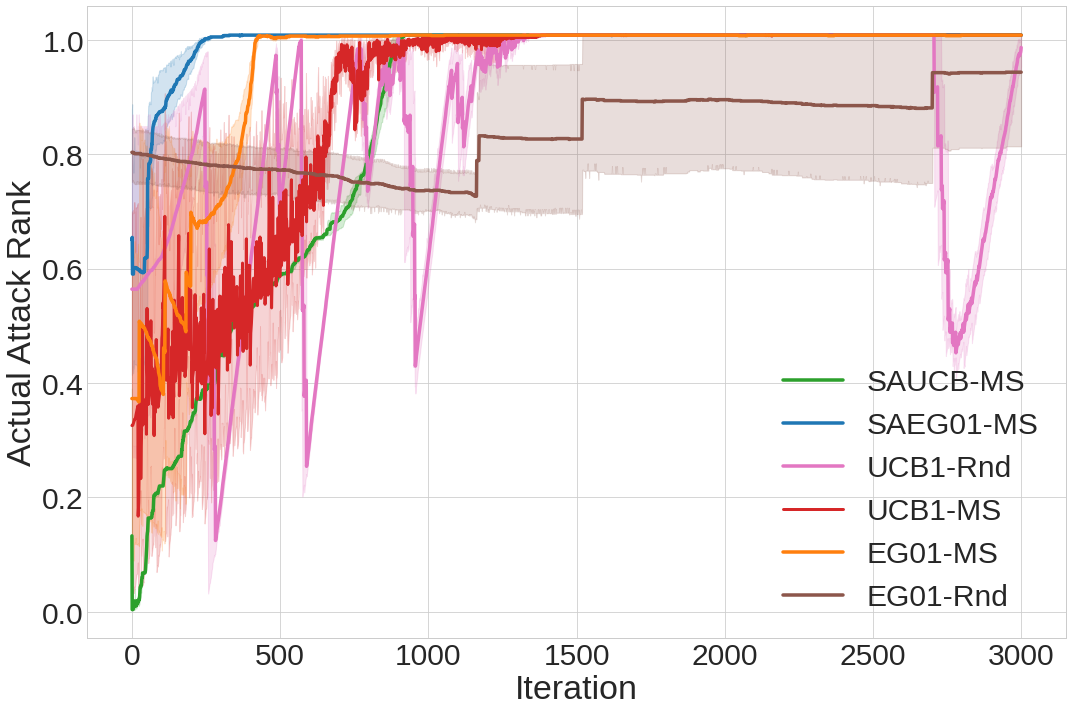

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-with-ci-0-00")

In [107]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//8).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//8).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//8).mean()


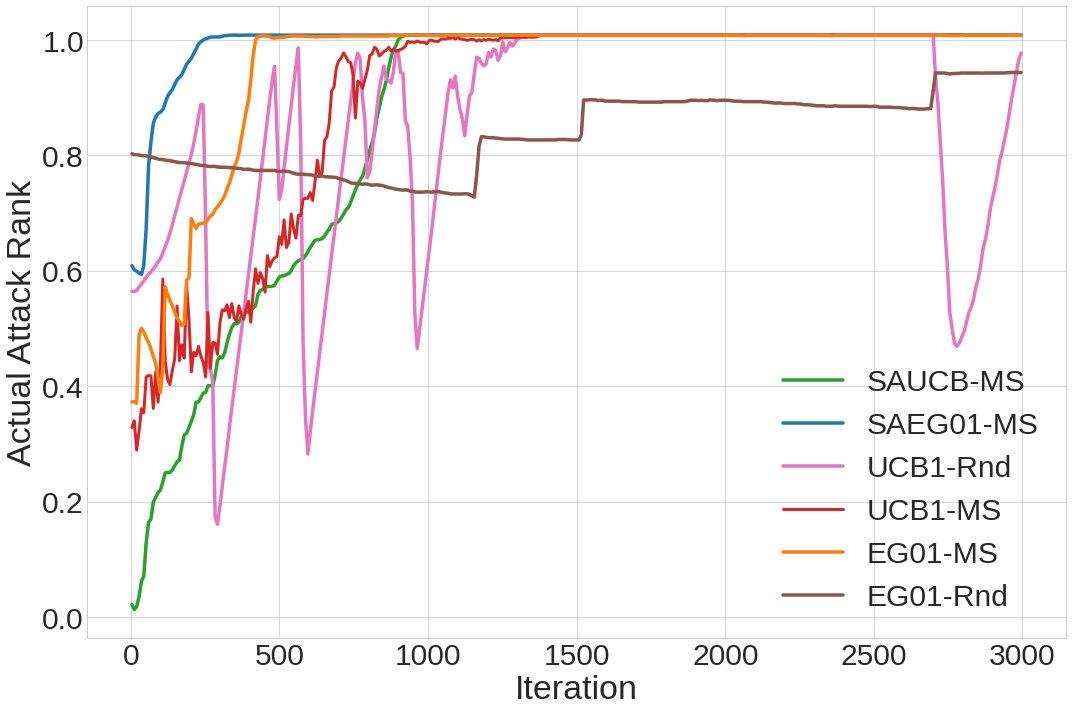

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-avg-0-00")

# 0.01 - 0.1

In [109]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()


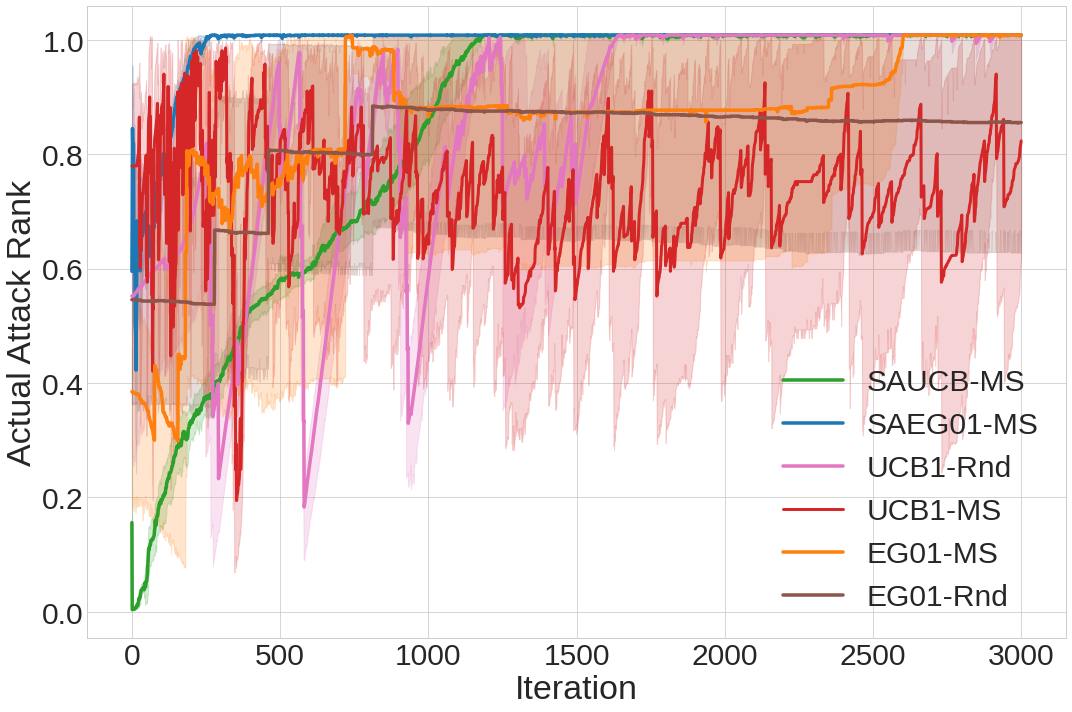

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0.01, FN=0.1, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-with-ci-001-01")

In [111]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()


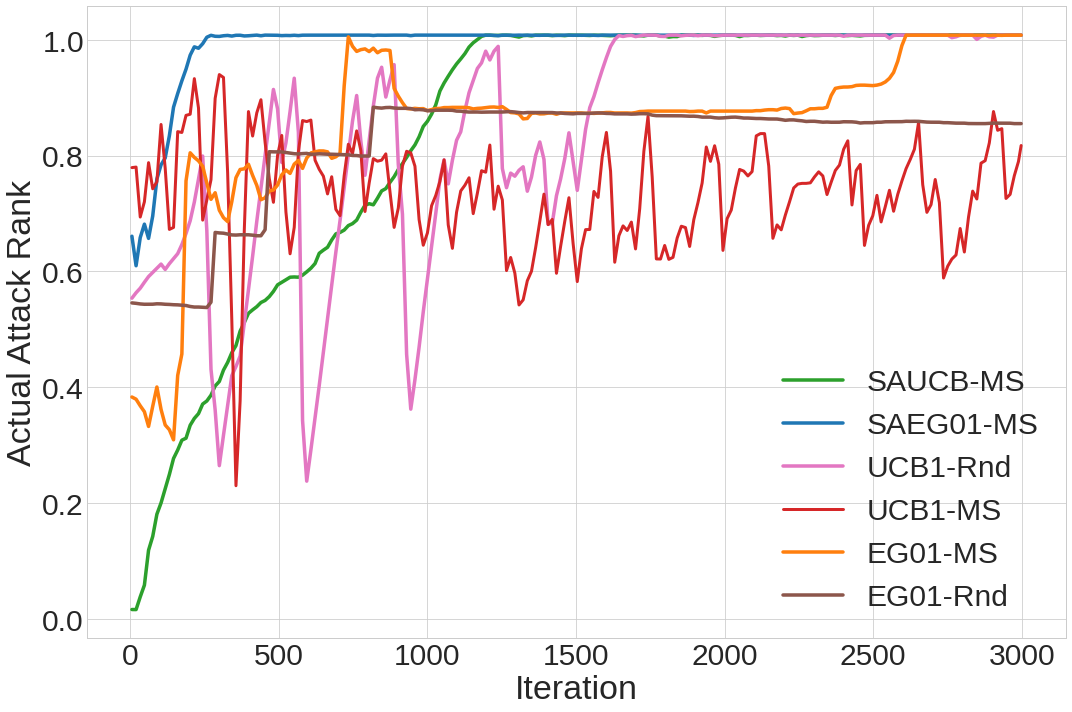

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0.01, FN=0.1, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-avg-001-01")

# 0.05 - 0.5

In [131]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

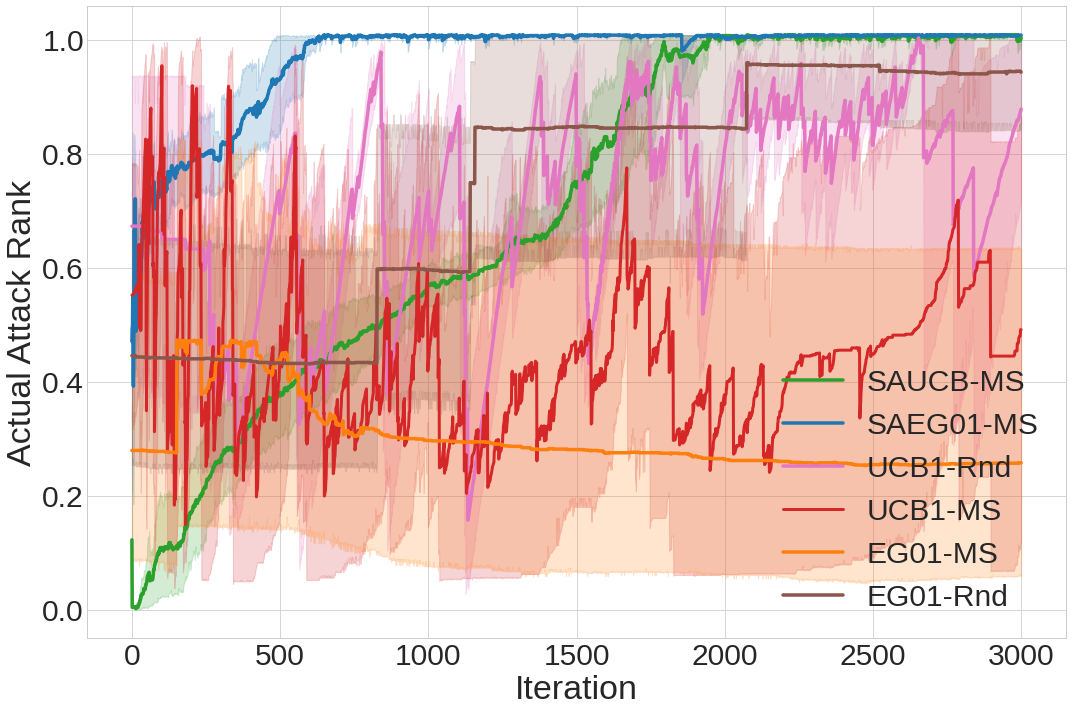

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0.05, FN=0.5, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-with-ci-005-05")

In [115]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MostSharedOrder_111125")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1RandomOrder_111125")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiMostSharedOrder_111125")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiRandomOrder_111125")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMostSharedOrder_111125")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiMostSharedOrder_111125")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyRandomOrder_111125")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiRandomOrder_111125")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

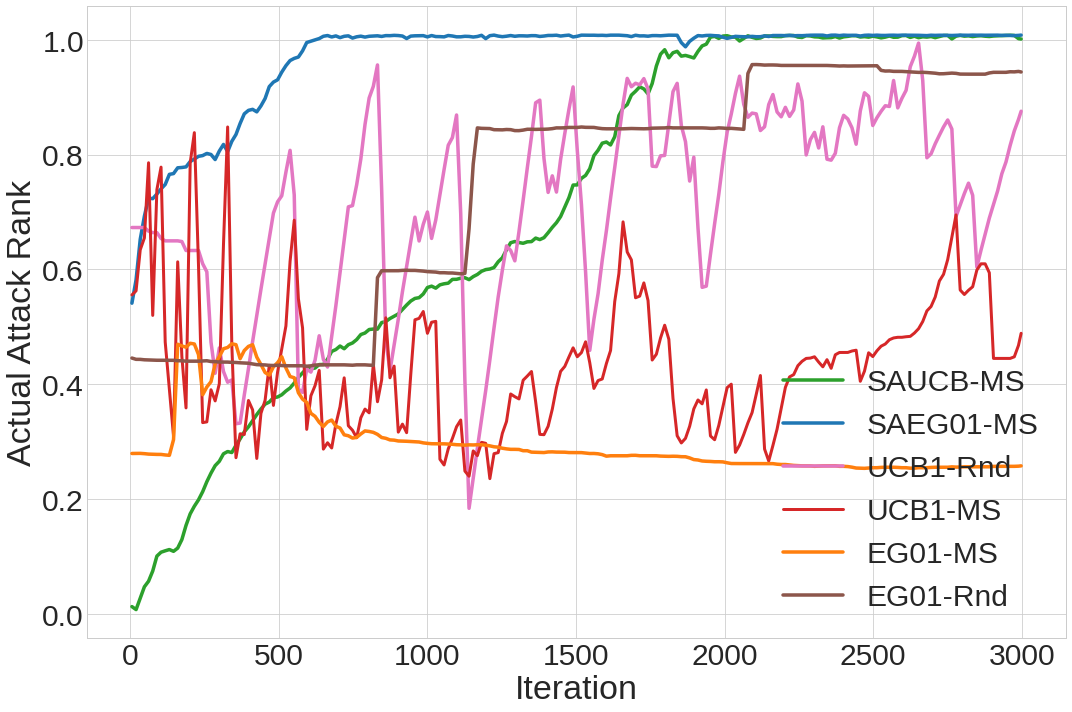

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


# fig.suptitle('Medium size evading attack (FP=0.05, FN=0.5, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/evading-medium-avg-005-05")

# Example Comparison

# 0-0

In [117]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

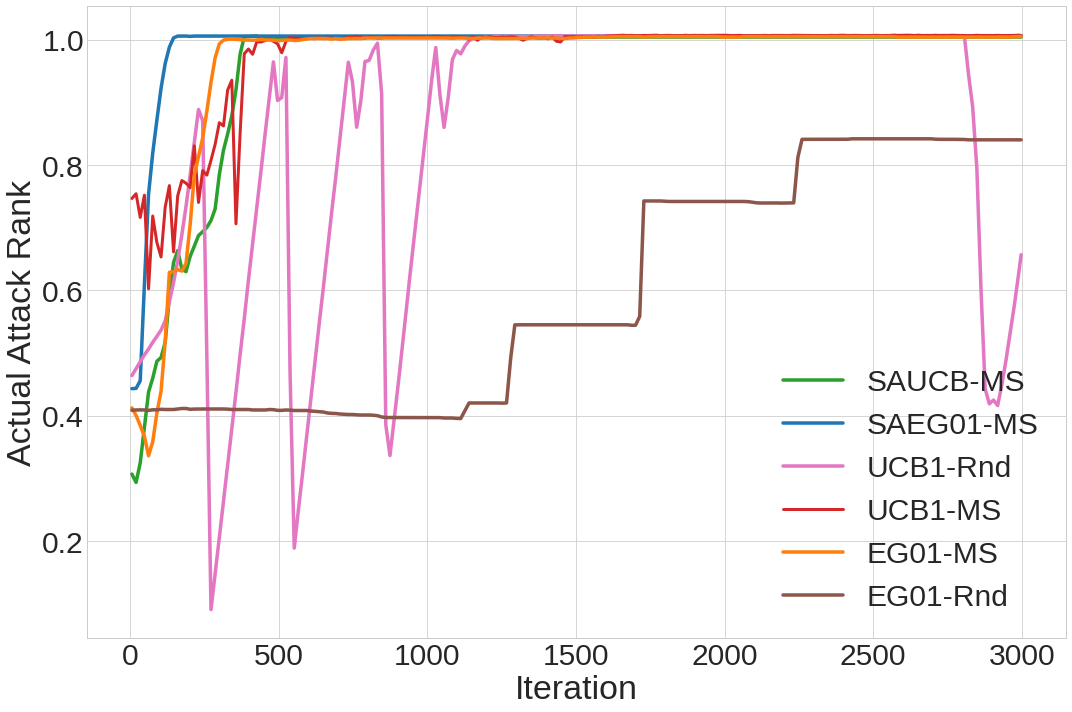

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-avg-0-0")

In [119]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387037/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

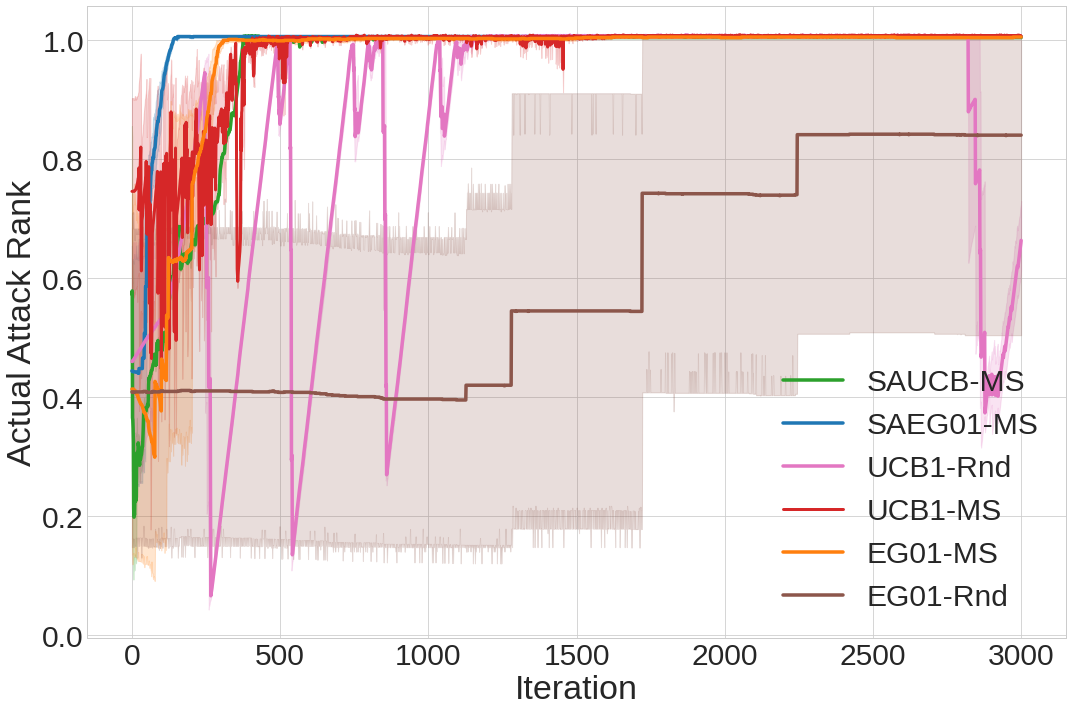

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-with-ci-0-0")

# 001-01

In [136]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

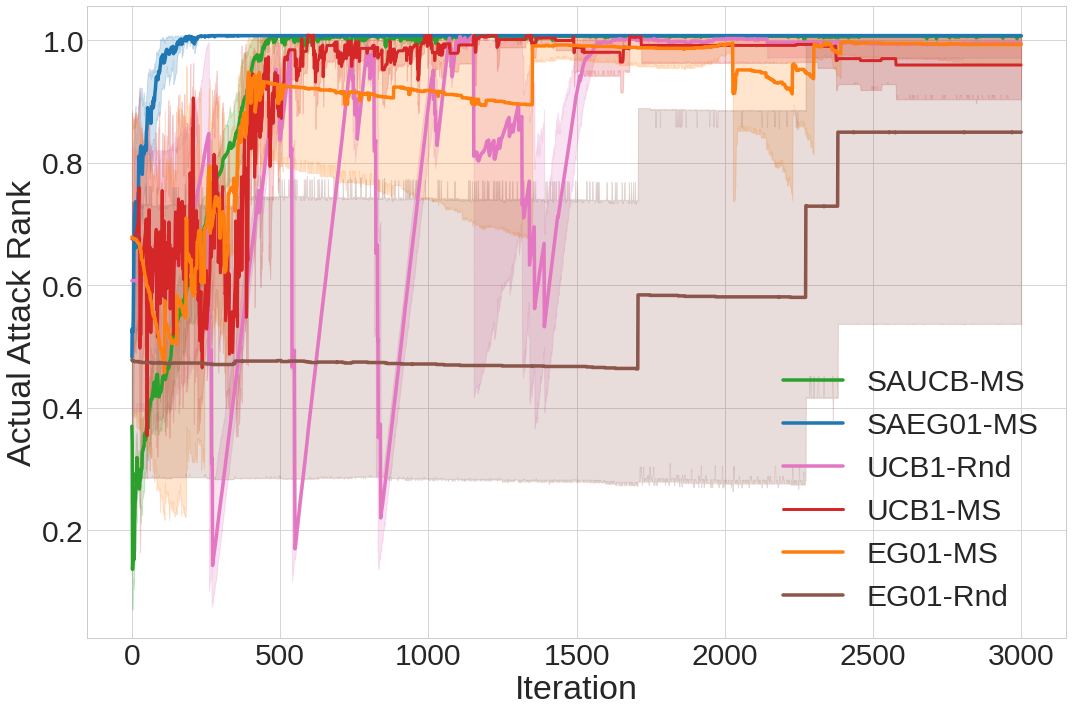

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0.01, FN=0.1, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-with-ci-001-01")

In [129]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/387038/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

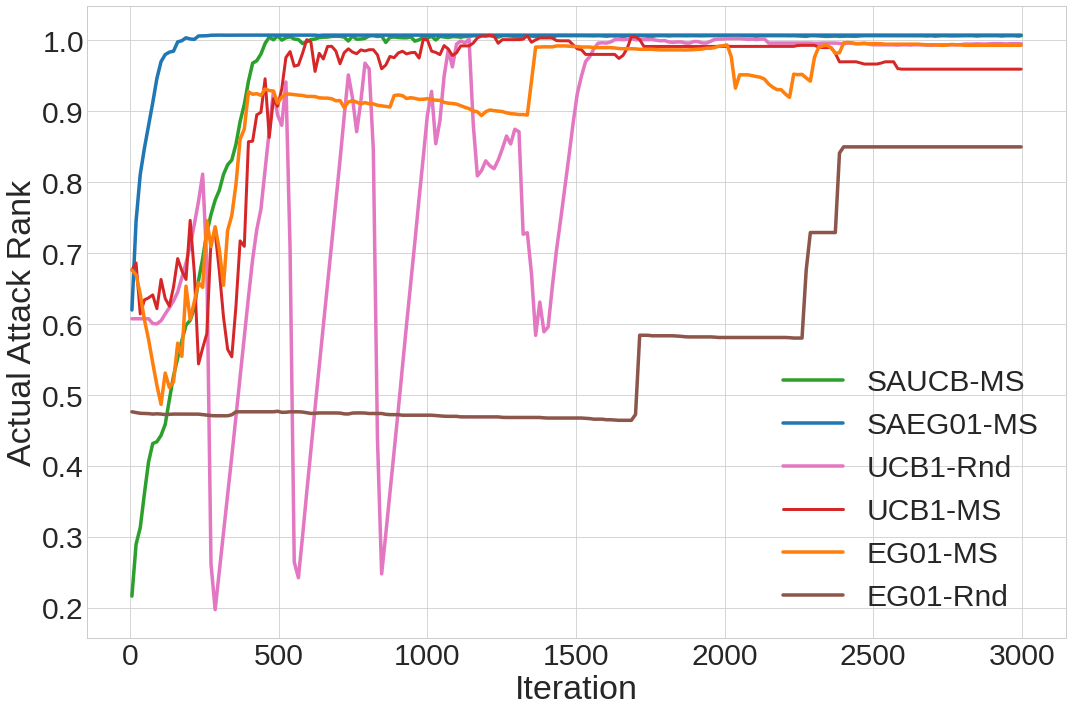

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0.01, FN=0.1, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-avg-001-01")

# 005-05

In [124]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

# merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
# merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
# merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
# merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
# merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
# merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

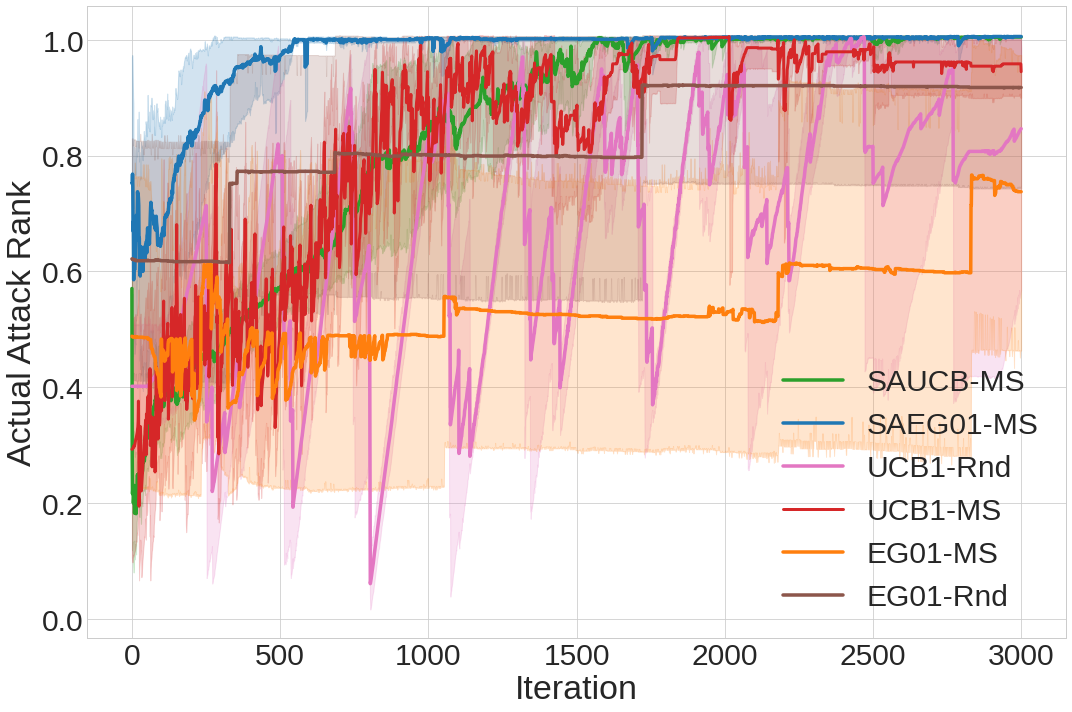

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0.05, FN=0.5, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-with-ci-005-05")

In [133]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MostSharedOrder_1999886")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1RandomOrder_1999886")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MultiMostSharedOrder_1999886")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "UCB1MultiRandomOrder_1999886")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMostSharedOrder_1999886")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMultiMostSharedOrder_1999886")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyRandomOrder_1999886")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_21/386447/place/", "EGreedyMultiRandomOrder_1999886")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby("iteration").mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby("iteration").mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()
merged_df_egreedy_mshared_grouped = merged_df_egreedy_mshared_grouped.groupby(np.arange(len(merged_df_egreedy_mshared_grouped))//14).mean()
merged_df_egreedy_mmshared_grouped = merged_df_egreedy_mmshared_grouped.groupby(np.arange(len(merged_df_egreedy_mmshared_grouped))//14).mean()
merged_df_egreedy_random_grouped = merged_df_egreedy_random_grouped.groupby(np.arange(len(merged_df_egreedy_random_grouped))//14).mean()

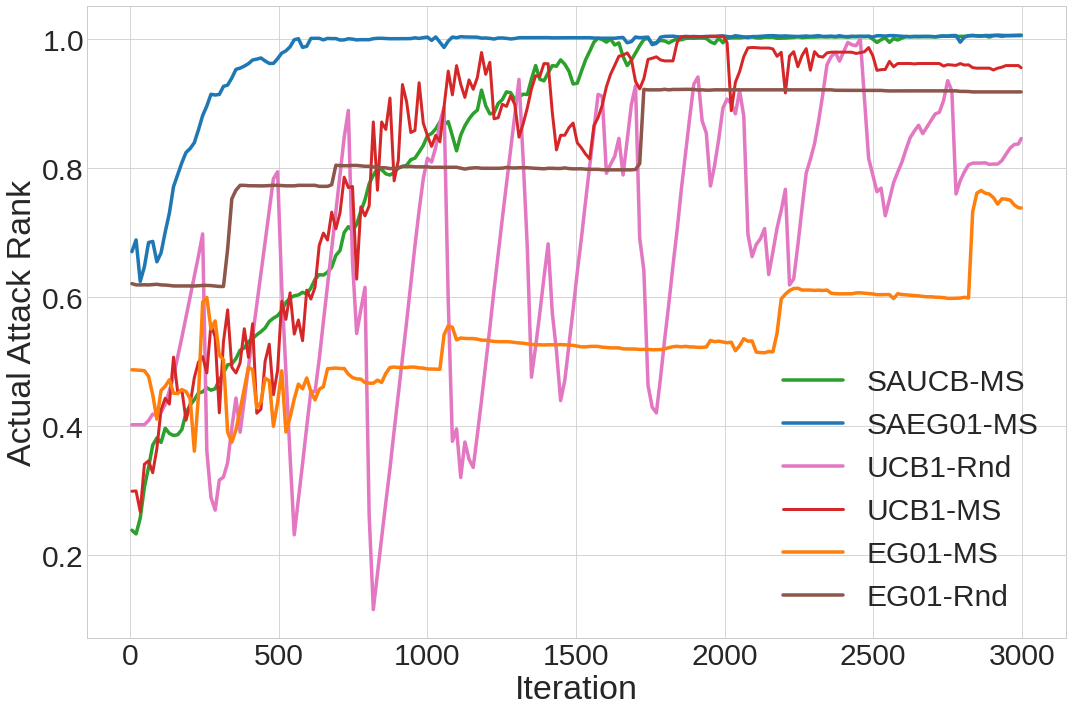

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")

# fig.suptitle('Medium size regular attack (FP=0.05, FN=0.5, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
save_fig(fig, "evading-attack/regular-medium-avg-005-05")

# Evading Attacks - Big Size

In [21]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MostSharedOrder_111132")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1RandomOrder_111132")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiMostSharedOrder_111132")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "UCB1MultiRandomOrder_111132")
merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMostSharedOrder_111132")
merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiMostSharedOrder_111132")
merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyRandomOrder_111132")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370848/place/", "EGreedyMultiRandomOrder_111132")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
# merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
# merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
# merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//8).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//8).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//8).mean()


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

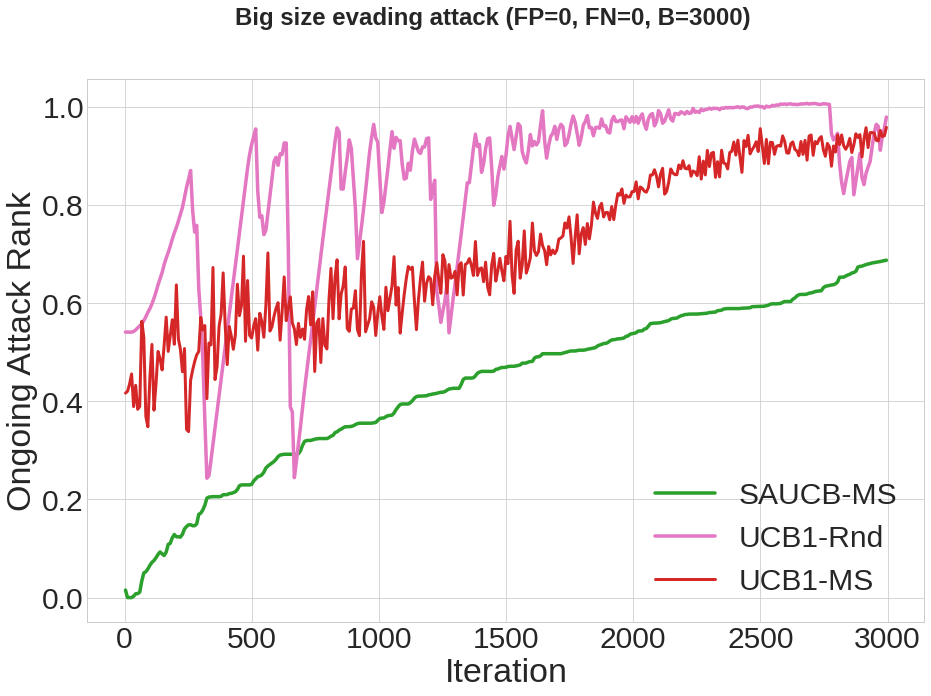

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
# sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
# sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
# sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


fig.suptitle('Big size evading attack (FP=0, FN=0, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-0-0")

In [23]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MostSharedOrder_111132")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1RandomOrder_111132")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiMostSharedOrder_111132")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "UCB1MultiRandomOrder_111132")
# merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMostSharedOrder_111132")
# merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiMostSharedOrder_111132")
# merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyRandomOrder_111132")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370846/place/", "EGreedyMultiRandomOrder_111132")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
# merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
# merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
# merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

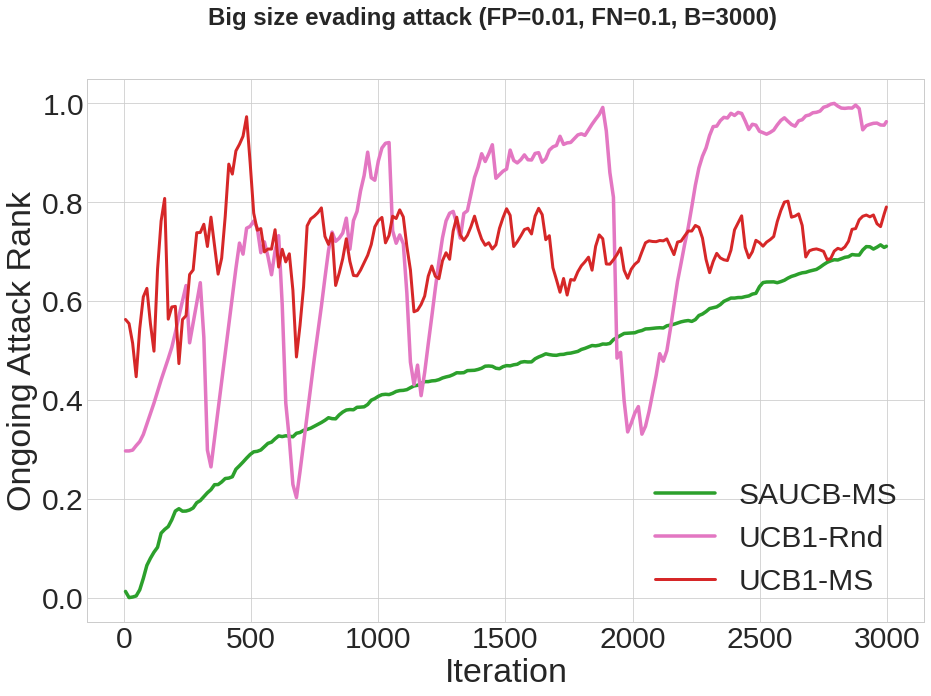

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
# sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
# sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
# sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


fig.suptitle('Big size evading attack (FP=0.01, FN=0.1, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-0-0")

In [25]:
merged_df_ucb1_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MostSharedOrder_111132")
merged_df_ucb1_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1RandomOrder_111132")
merged_df_ucb1_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiMostSharedOrder_111132")
# merged_df_ucb1_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "UCB1MultiRandomOrder_111132")
# merged_df_egreedy_mshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMostSharedOrder_111132")
# merged_df_egreedy_mmshared_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiMostSharedOrder_111132")
# merged_df_egreedy_random_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyRandomOrder_111132")
# merged_df_egreedy_mrandom_grouped = merge_ucb_ratings("/home/liad/dev/research/bgucpu/results/2021_5_19/370847/place/", "EGreedyMultiRandomOrder_111132")

max_rank = 250
merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] = merged_df_ucb1_mshared_grouped["UCB1MostSharedOrder"] / max_rank
merged_df_ucb1_random_grouped["UCB1RandomOrder"] = merged_df_ucb1_random_grouped["UCB1RandomOrder"] / max_rank
merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] = merged_df_ucb1_mmshared_grouped["UCB1MultiMostSharedOrder"] / max_rank
# merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] = merged_df_ucb1_mrandom_grouped["UCB1MultiRandomOrder"] / max_rank
# merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] = merged_df_egreedy_mshared_grouped["EGreedyMostSharedOrder"] / max_rank
# merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] = merged_df_egreedy_mmshared_grouped["EGreedyMultiMostSharedOrder"] / max_rank
# merged_df_egreedy_random_grouped["EGreedyRandomOrder"] = merged_df_egreedy_random_grouped["EGreedyRandomOrder"] / max_rank
# merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] = merged_df_egreedy_mrandom_grouped["EGreedyMultiRandomOrder"] / max_rank

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby("iteration").mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby("iteration").mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby("iteration").mean()

merged_df_ucb1_mshared_grouped = merged_df_ucb1_mshared_grouped.groupby(np.arange(len(merged_df_ucb1_mshared_grouped))//14).mean()
merged_df_ucb1_random_grouped = merged_df_ucb1_random_grouped.groupby(np.arange(len(merged_df_ucb1_random_grouped))//14).mean()
merged_df_ucb1_mmshared_grouped = merged_df_ucb1_mmshared_grouped.groupby(np.arange(len(merged_df_ucb1_mmshared_grouped))//14).mean()


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text major ticklabel objects>)

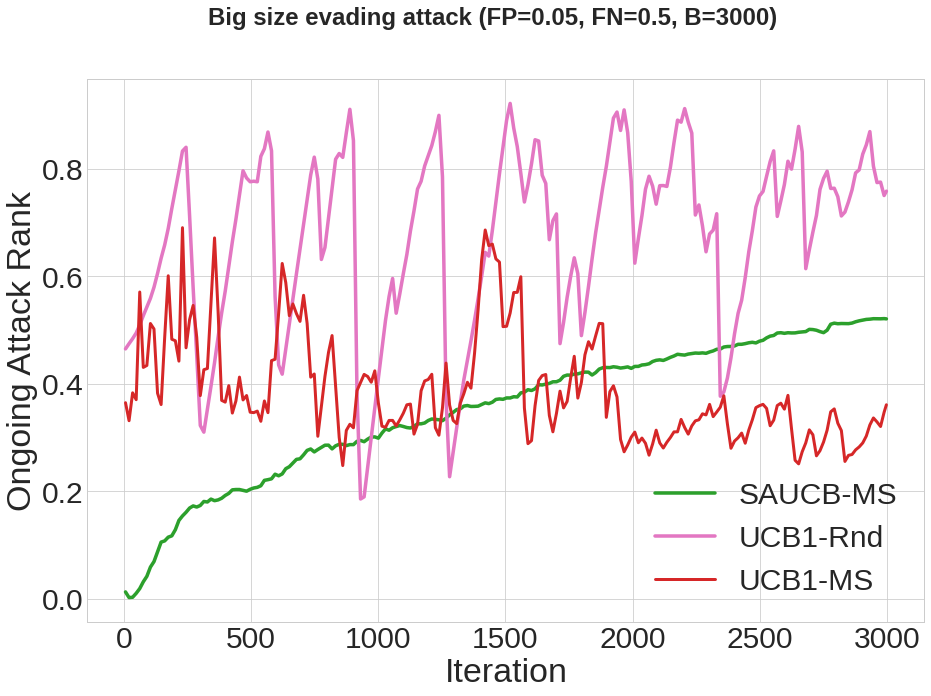

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(15,10))

sns.lineplot('Unnamed: 0', 'UCB1MultiMostSharedOrder', linewidth=3.5, data=merged_df_ucb1_mmshared_grouped, label="SAUCB-MS", color="tab:green")
# sns.lineplot('Unnamed: 0', 'EGreedyMultiMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mmshared_grouped, label="SAEG01-MS", color="tab:blue")
sns.lineplot('Unnamed: 0', 'UCB1RandomOrder',  linewidth=3.5, data=merged_df_ucb1_random_grouped, label="UCB1-Rnd", color="tab:pink")
sns.lineplot('Unnamed: 0', 'UCB1MostSharedOrder', linewidth=3, data=merged_df_ucb1_mshared_grouped, label="UCB1-MS",color="tab:red")
# sns.lineplot('Unnamed: 0', 'UCB1MultiRandomOrder', linewidth=3.5,  data=merged_df_ucb1_mrandom_grouped, label="UCB1MultiRandom")
# sns.lineplot('Unnamed: 0', 'EGreedyMostSharedOrder',  linewidth=3.5, data=merged_df_egreedy_mshared_grouped, label="EG01-MS", color="tab:orange")
# sns.lineplot('Unnamed: 0', 'EGreedyRandomOrder',  linewidth=3.5, data=merged_df_egreedy_random_grouped, label="EG01-Rnd", color='tab:brown')
# sns.lineplot('Unnamed: 0', 'EGreedyMultiRandomOrder',  linewidth=3, data=merged_df_egreedy_mrandom_grouped, label="EGreedy01MultiRandomOrder")")


fig.suptitle('Big size evading attack (FP=0.05, FN=0.5, B=3000)', fontweight="bold", fontsize=24)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('Actual Attack Rank', fontsize=34)
plt.legend(loc=4, prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.tight_layout()
# save_fig(fig, "ongoing-attack-rating/ongoing-attack-rating-ucb-0-0")